# **Logistic Regression**

Today, we will build a logistic regression model to predict credit card default. To do this, let's start with loading data.

We will import data from the UCI Machine Learning repository. For doing this, we need to install the package, `ucimlrepo`.

For this, we will use command:

```
pip install ucimlrepo
```



`pip` is a package manager for Python, used to install and manage software packages written in Python.

The name "pip" stands for "Python Installer Package". It simplifies the process of downloading and installing Python packages from the Python Package Index (PyPI) and other repositories.

In [1]:
pip install ucimlrepo

Below we first import the `fetch_ucirepo` function from `ucimlrepo`.

Next, we use `fetch_ucirepo` to retrieve a dataset with the ID 350 from UC Irvine ML repository.

Next, we assign the features and target variables from the fetched dataset to `features` and `target` respectively.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
features = default_of_credit_card_clients.data.features
target = default_of_credit_card_clients.data.targets


**Target variable:** binary variable, default payment (Yes = 1, No = 0), as the response variable.

**Explanatory variables:**

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Let's look at the dataframe, features:

In [ ]:
features

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
features.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [ ]:
features.shape

(30000, 23)

Let's look at X1 and see its summary stats:

In [ ]:
features[['X1']].describe()

,X1
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


Let's check the missingess of our features:

In [ ]:
features.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

Let's look at Y

In [ ]:
target

,Y
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [ ]:
target['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [ ]:
target.value_counts(normalize=True)  #returns proportions rather than frequencies

Y
0    0.7788
1    0.2212
dtype: float64

Also, let's check missingness of Y:

In [ ]:
target.isnull().sum()

Y    0
dtype: int64

Let's start with a simple logistic regression where we have only one feature - X1 - the amount of given credit.

Let's create a NumPy array called X1 which saves X1 from features dataframe as an array using the `asarray()` function from NumPy.

Why do we do this? Because Scikit-learn uses NumPy arrays, i.e., need to feed it data in array form.

Scikit-learn is a popular Python library for ML.

In [ ]:
import numpy as np

X1 = np.asarray(features[['X1']])
X1[0:5]

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000]])

Let's now create our target variable for feeding in the model:

In [ ]:
y1 = np.asarray(target[['Y']])
y1[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

Now, we will split our data into train and test sets:

In the first line, we import the `train_test_split` function from sk learn.

Second line: We split the data into training and test sets:

X1 split into X_train and X_test

y1 split into y_train and y_test

`test_size = 0.2` defines the size of test data. 20% of obs in test set.

`random_state` sets seed for reproducibility of results. Set it equal to an integer.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 1) (24000, 1)
Test set: (6000, 1) (6000, 1)


In [ ]:
print(type(X_train)); print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Let's train the model now.

To do this, we first import the logistic regression model class from sk learn.

Next, we assign the model to an object called LR1. We are setting the penalty argument of the model to None.

In other words, we are not using any regularization - we will learn what it is in the next couple of lectures!

Next, in the same line (second line below), we use the fit() method which fits the logistic regression model on the training data

In [ ]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(penalty=None).fit(X_train,y_train)
LR1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

Next, we can make predictions on the test set.

By default, the probability cutoff is 0.5.

We will use the `predict()` method of logistic regression model to make predictions:

In [ ]:
yhat1 = LR1.predict(X_test)
yhat1[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

`predict_proba` returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

Let's use it to see predicted probabilities:

In [ ]:
yhat1_prob_temp = LR1.predict_proba(X_test)
yhat1_prob_temp

array([[0.60253041, 0.39746959],
       [0.7520146 , 0.2479854 ],
       [0.66671533, 0.33328467],
       ...,
       [0.88192238, 0.11807762],
       [0.7769637 , 0.2230363 ],
       [0.55181577, 0.44818423]])

Notice above that the rows will sum to 1. Why?

Next, let's subset the second column from the result of `predict.proba()` method. We need it for making an ROC curve below.

Remember the second column gives probability of default.

In [ ]:
yhat1_prob = LR1.predict_proba(X_test)[:,1]
yhat1_prob

array([0.39746959, 0.2479854 , 0.33328467, ..., 0.11807762, 0.2230363 ,
       0.44818423])

Next, let's try and visualize the confusion matrix that resulted from our model:

In the first line below, we import the `ConfusionMatrixDisplay` class from the `sklearn.metrics` module. This class is used to visualize confusion matrices.

Next, we import the `classification_report` and `confusion_matrix` functions from the `sklearn.metrics` module.

These functions are used to generate a textual summary of classification performance and compute the confusion matrix, respectively.

In the third line, the confusion matrix is built using the true labels `y_test` and the predicted labels `yhat1` obtained from our logistic regression model.

Next:
`disp = ConfusionMatrixDisplay(confusion_matrix=cm)` This line creates a ConfusionMatrixDisplay object with the computed confusion matrix cm.

`disp.plot()`: This line plots the confusion matrix using the plot() method of the ConfusionMatrixDisplay object.

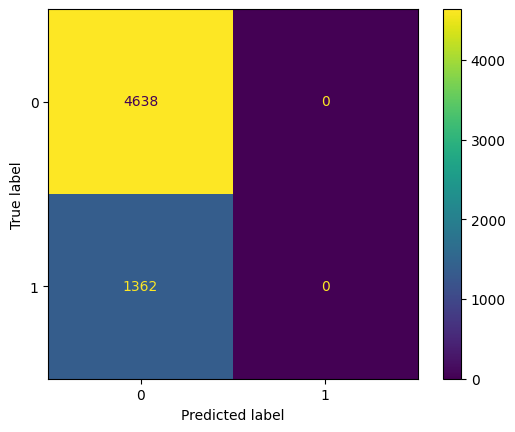

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
cm

array([[4638,    0],
       [1362,    0]])

The model is always predicting no default. If we look at `yhat1_prob`:

In [ ]:
print(type(yhat1_prob))

<class 'numpy.ndarray'>


Let's find some summary stats for this numpy array by first converting it to a dataframe and then using the `describe()` method on it:

In [ ]:
prob_df = pd.DataFrame(yhat1_prob)

prob_df.describe()

,0
count,6000.000000
mean,0.273332
std,0.136473
min,0.004459
25%,0.159215
50%,0.274738
75%,0.414187
max,0.482673


Note the minimum and maximum predicted probability values. Do the model classifications make sense now?

In the confusion matrix above, we have TN, FP, FN, and TP.

Below, we are using the numpy ravel() function on cm to create 1D arrays out of it. We assign the number of true negatives to tn, number of false positives to fp, and so on...

In [ ]:
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

4638 0 1362 0


Let's calculate sensitivity and specificity now:

We know sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

In [ ]:
sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)

print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.0
Specificity:  1.0


Do these sensitivity and specificity values make sense? Recall discussion in last lecture!

In [ ]:
#A couple of things for you to explore - we are not using these here:
#Check what each of these does!

#np.set_printoptions(precision=2)
#y_test = y_test.ravel()



Let's now plot the Receiver Operating Characteristic (ROC) curve using the `roc_curve` and `roc_auc_score` functions from scikit-learn, and then visualize it using Matplotlib.

`roc_auc_score` calculate the Area Under the ROC Curve (AUC)

`roc_curve` is used to calculate the ROC curve

`fpr, tpr, thresholds = roc_curve(y_test, yhat1_prob)`: This line calculates the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds using the `roc_curve` function.

`roc_auc = roc_auc_score(y_test, yhat1_prob)`: This line calculates the AUC score.

`plt.figure(figsize=(8, 6))`: This line creates a new figure with a specified size.

`plt.plot(fpr, tpr, color='blue', lw=2)`: This line plots the ROC curve using the FPR and TPR values calculated earlier.

`plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')`: This line plots a diagonal dashed line representing random guessing.

`plt.xlim([0.0, 1.0])`: This line sets the limits for the x-axis.

`plt.ylim([0.0, 1.05])`: This line sets the limits for the y-axis.

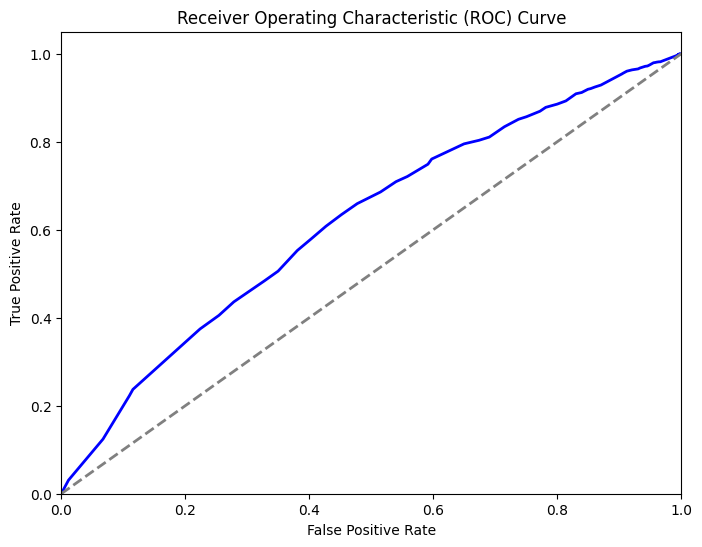

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yhat1_prob)
roc_auc = roc_auc_score(y_test, yhat1_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()

Let's see what the AUC score is:

In [ ]:
roc_auc #according to the scale we saw in class, this is ___ ?

0.617965915862007

In [ ]:
print(fpr); print(tpr); print(thresholds)

[0.         0.01164295 0.06727038 0.10974558 0.11556705 0.22380336
 0.2542044  0.27835274 0.32772747 0.34971971 0.38076757 0.4025442
 0.42690815 0.45191893 0.47736093 0.5148771  0.53988788 0.55821475
 0.59141871 0.5974558  0.64963346 0.6737818  0.69038379 0.71474774
 0.7373868  0.75032342 0.77210004 0.78137128 0.79991376 0.81392842
 0.83009918 0.83937042 0.8495041  0.8538163  0.86071583 0.87041828
 0.90383786 0.90642518 0.91224666 0.92043984 0.93035791 0.93359207
 0.94178525 0.94545063 0.94868478 0.95515308 0.95838724 0.96054334
 0.96420871 0.9661492  0.99202242 0.99266925 0.99331608 0.99353169
 0.99460975 0.99504097 0.9956878  0.99611902 0.99611902 0.99698146
 0.99762829 0.9978439  0.99892195 0.99935317 1.        ]
[0.         0.030837   0.12408223 0.22246696 0.23715125 0.37444934
 0.40528634 0.43612335 0.48384728 0.50587372 0.55286344 0.57856094
 0.60792952 0.63436123 0.65932452 0.68575624 0.7092511  0.72099853
 0.74889868 0.76064611 0.79515419 0.80323054 0.81057269 0.83406755
 0.850

In [ ]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4638
           1       0.00      0.00      0.00      1362

    accuracy                           0.77      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.77      0.67      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Next task:

Now train a logistic regression model with features X1, X18-23

And repeat the same process with this model.

Try and overlay the ROC curve for that model on this curve. Which of the two models is better?

Lastly, we can see some evaluation metrics from classification_report:

Let's discuss these in the next session!

In [ ]:
#Debug a couple of things:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yhat1_prob)
roc_auc = roc_auc_score(y_test, yhat1_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend(loc=&quot;lower right&quot;)
plt.show()